In [85]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib as mpl

import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

rc('text', usetex=True)
mpl.rcParams.update({'font.size': 19})
mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 



In [2]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut)
    return cutDataframe

In [71]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
  
    scalar.append('isBKG')
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
    scalar.append('x_e')
    scalar.append('y_e')
    scalar.append('Q2_e')
    
    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')

    scalar.append('njets')
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    cols.append('jet_eta')
    cols.append('jet_phi')
    
    if(isMC):
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')
        

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [4]:
def printSummary(df):
    print df['e_pt'].mean(), ' mean lepton pt'
    print df['y'].mean(), ' mean inelasticity'
    print df['jet_p'].mean(), ' mean jet p'
    print df['jet_pt'].mean(), ' mean jet pT'
    print df['jet_pt'].describe()

    print df['x'].mean(), ' mean x'
    print df['Q2'].mean(), ' mean Q2'
    print df['Q2'].describe()
    return

In [72]:
def getData(inputFiles):
    
    cols = []
    scalar = []  
    scalar.append('isBKG')
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
        
    scalar.append('x_e')
    scalar.append('y_e')
    scalar.append('Q2_e')
    
    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')

    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')

    scalar.append('njets')

    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [73]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'isBKG<1.0', 'isBKG')
    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [74]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'jet_pt>10', 'jet_pt>10')
    temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

In [17]:
df = {}
df_jet= {}

In [76]:
df['nom'] = applyCuts(getData(['data_calibrated.root']))
df_jet['nom']      = applyCutsJets(getJetData(['data_calibrated.root']))



Processed data_calibrated.root in 0.3 seconds
abs(vertex_z)<25 and and vertex_z!=0 110989  fraction kept: 79.5
0.2 < y < 0.7 65545  fraction kept: 59.1
Q2>150 65545  fraction kept: 100.0
e_pt >15 21030  fraction kept: 32.1
isBKG 18260  fraction kept: 86.8

Processed data_calibrated.root in 4.5 seconds
abs(vertex_z)<25 and and vertex_z!=0 113098  fraction kept: 90.2
0.2 < y < 0.7 67526  fraction kept: 59.7
Q2>150 67526  fraction kept: 100.0
e_pt >15 24135  fraction kept: 35.7
jet_pt>10 21817  fraction kept: 90.4
isBKG 19035  fraction kept: 87.2


In [77]:
df['raw'] = applyCuts(getData(['data_notcalibrated.root']))
df_jet['raw']      = applyCutsJets(getJetData(['data_notcalibrated.root']))



Processed data_notcalibrated.root in 0.3 seconds
abs(vertex_z)<25 and and vertex_z!=0 110989  fraction kept: 79.5
0.2 < y < 0.7 65545  fraction kept: 59.1
Q2>150 65545  fraction kept: 100.0
e_pt >15 21030  fraction kept: 32.1
isBKG 18260  fraction kept: 86.8

Processed data_notcalibrated.root in 4.6 seconds
abs(vertex_z)<25 and and vertex_z!=0 109453  fraction kept: 90.7
0.2 < y < 0.7 64896  fraction kept: 59.3
Q2>150 64896  fraction kept: 100.0
e_pt >15 23691  fraction kept: 36.5
jet_pt>10 21242  fraction kept: 89.7
isBKG 18530  fraction kept: 87.2


Cross section [   0.            0.          766.91801431 2258.92291266 1351.88720886
  774.51898379  442.19830599  253.68714855  142.95526859   80.80112308
   44.08646579]
Cross section [ 763.56714435  864.71609232 1103.24401194 1182.25150266 1104.77184301
  785.20832308  489.68977083  286.96506741  163.63061735   98.66242397
   45.40905976]
Cross section [ 716.59792683  846.07287917 1081.45387689 1158.51644307 1117.49881464
  830.40895778  550.37330924  319.55919342  180.9585287   101.38414601
   53.78548826]


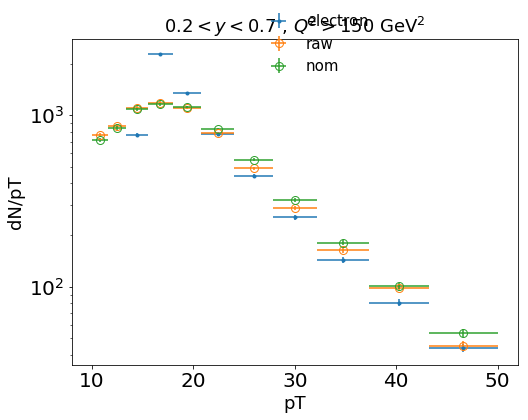

In [68]:
import seaborn as sns
nbins = 12
minpt = 10
maxpt = max(df_jet['nom']['jet_pt'])
fig, ax1 = plt.subplots(figsize=(8,6))

##Electron distribution
y, x  = np.histogram(df['nom']['e_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
yerr = np.sqrt(y)
y = y/(xerr*2.0)
yerr = yerr/(xerr*2.0)
print 'Cross section', y 

plt.errorbar(x,y, yerr=yerr,  xerr = xerr, fmt='.',ls='none',label=r'$\mathrm{electron}$')


#jet distribution

for key in ['raw','nom']:
    y, x  = np.histogram(df_jet[key]['jet_pt'],bins=np.logspace(np.log10(minpt),np.log10(maxpt),nbins))
    xerr = (x[1:] - x[:-1])/2.0
    x = (x[1:]+x[:-1])/2

    yerr = np.sqrt(y)
    y = y/(xerr*2.0)
    yerr = yerr/(xerr*2.0)
    print 'Cross section', y 
    plt.errorbar(x,y, yerr=yerr,xerr = xerr, fmt='o',ls='none',markersize=8,fillstyle='none',label=key)











plt.yscale('log')
ax1.set_xlabel('pT' ,fontsize=18)
ax1.set_ylabel('dN/pT', fontsize=18)
plt.title('$0.2 < y < 0.7$ , $Q^2 > 150\ \mathrm{GeV^2}$',   fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(loc='best',frameon=False,fontsize=18)#bbox_to_anchor=(0.40, 0.85

ax1.tick_params('both',labelsize=20)

plt.savefig('H1_CrossSection_NC.png', bbox_inches='tight')
plt.savefig('H1_CrossSection_NC.pdf', bbox_inches='tight')

plt.legend(loc='best',frameon=False,fontsize=15,bbox_to_anchor=(0.40, 0.85))

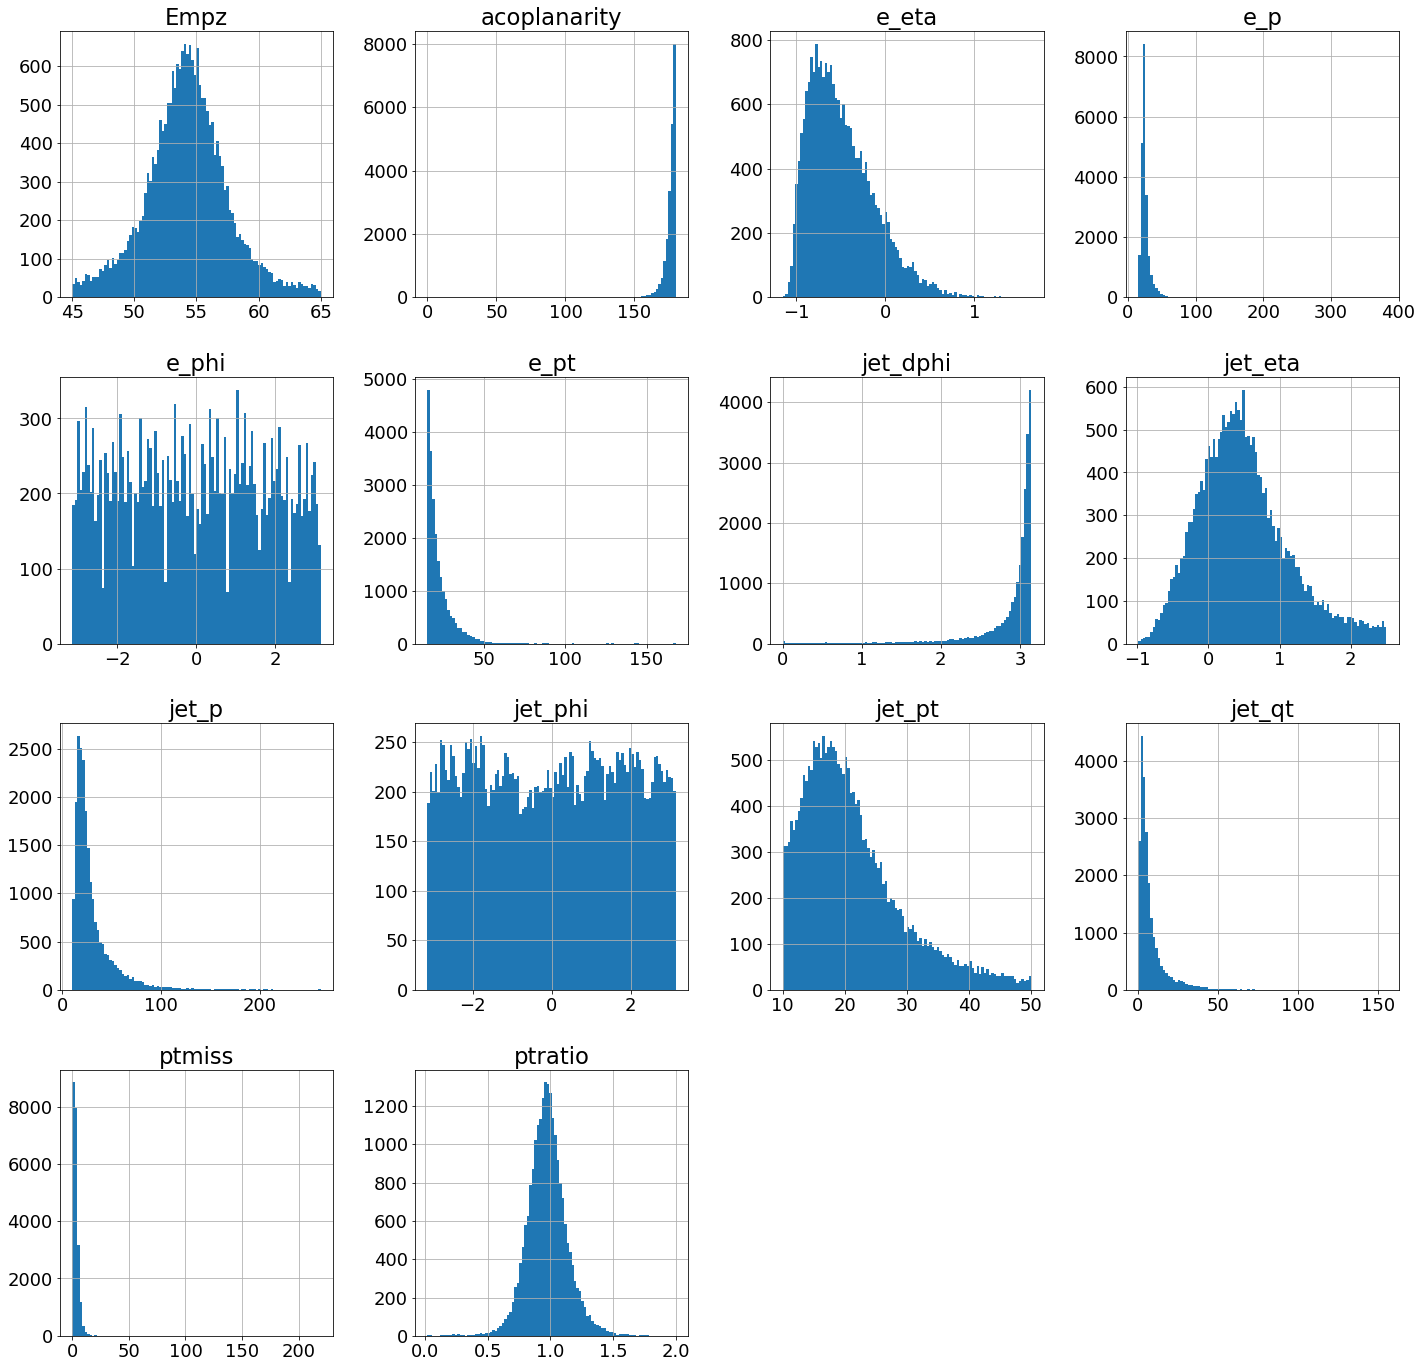

In [52]:
df_jet['nom'].hist(figsize=(24,24),bins=100,column=['jet_qt','jet_pt','e_pt','jet_dphi','jet_phi','e_phi','jet_eta','e_eta','acoplanarity','ptmiss','ptratio','Empz','jet_p','e_p'])
plt.yscale('log')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f03889ea6d0>,
      dtype=object)

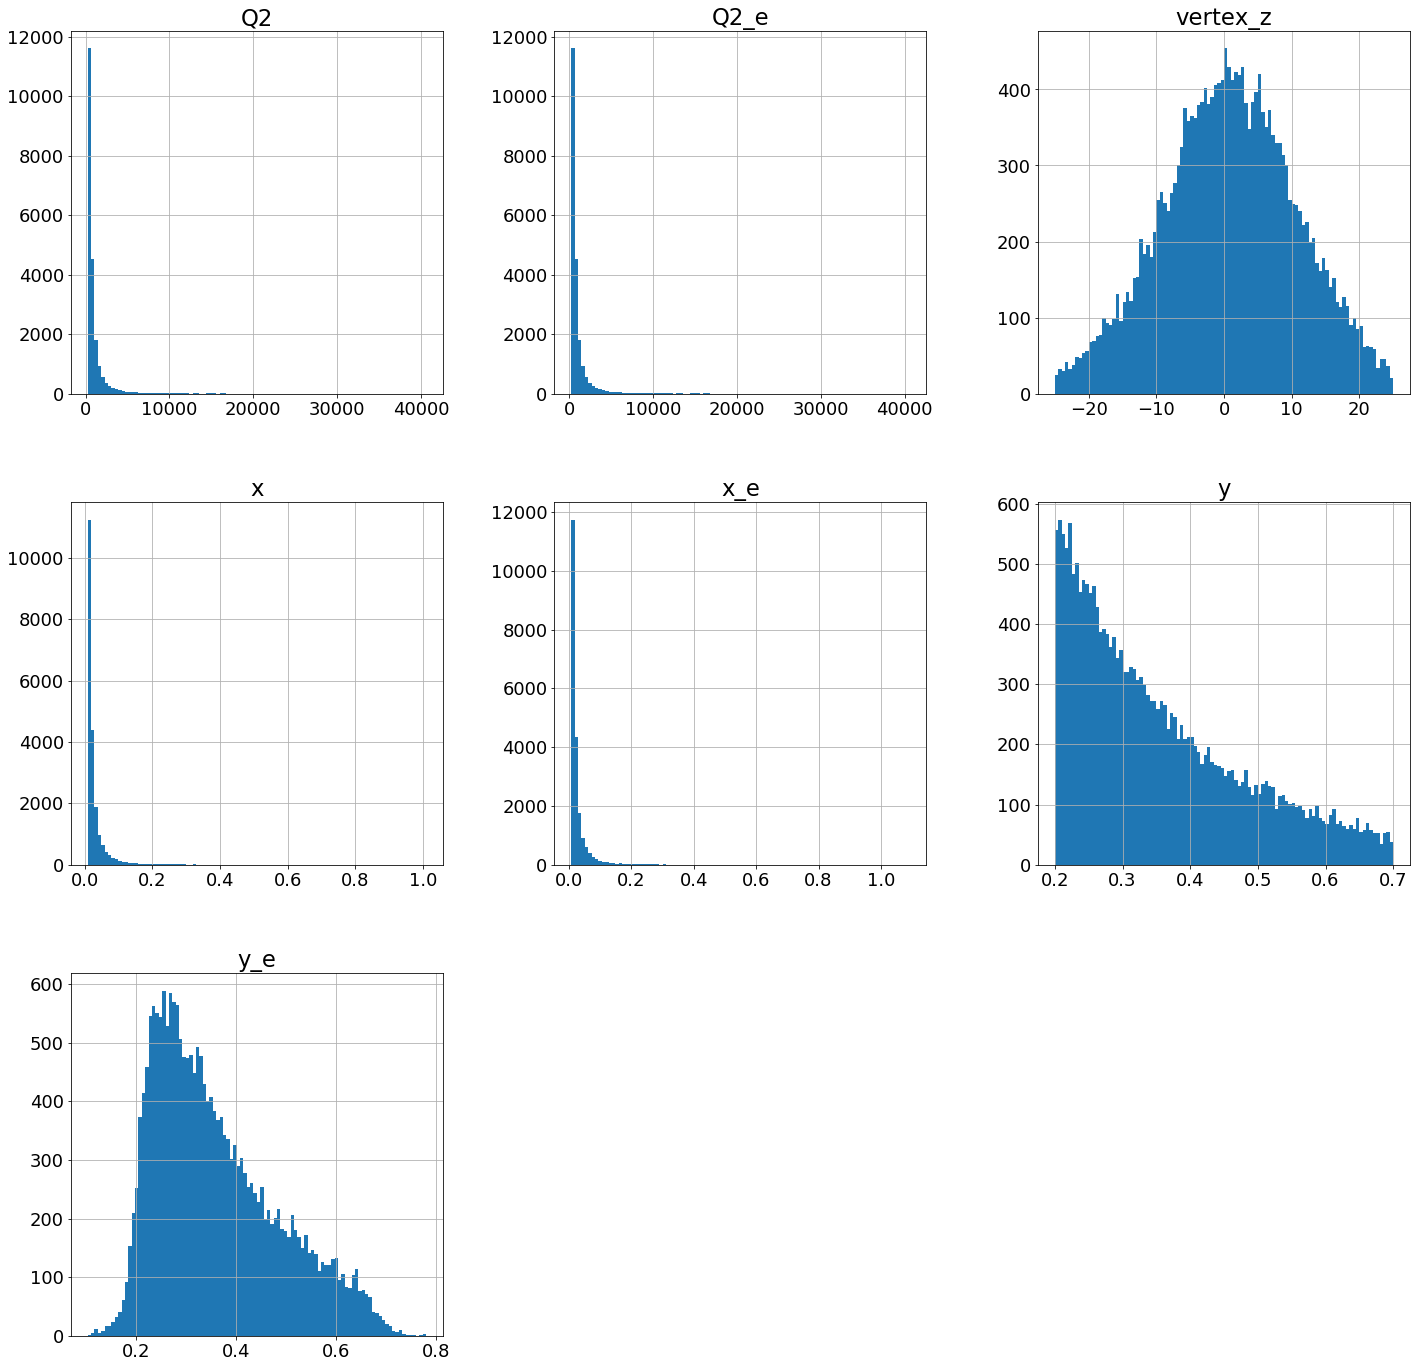

In [51]:
rc('text', usetex=False)
df['nom'].hist(figsize=(24,24),bins=100,column=['Q2','Q2_e','x','x_e','y','y_e','vertex_z'])

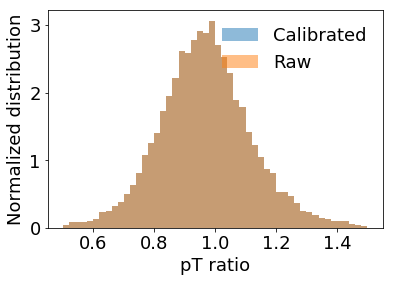

0.9742093
0.9763817


In [84]:
plt.hist(df['nom']['ptratio'],range=(0.5,1.5),bins=50,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df['raw']['ptratio'],range=(0.5,1.5),bins=50,alpha=0.5,normed=True, label='Raw')
#plt.yscale('log')
plt.legend(loc='best',frameon=False)
plt.ylabel('Normalized distribution')
plt.xlabel('pT ratio')

plt.show()

print df_jet['nom']['ptratio'].mean()
print df_jet['raw']['ptratio'].mean()

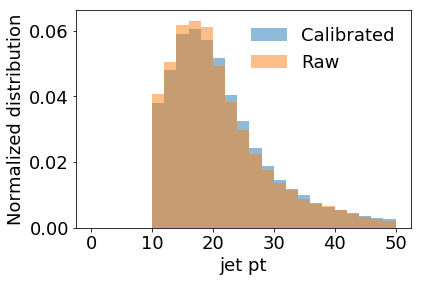

In [50]:
plt.hist(df_jet['nom']['jet_pt'],range=(0,50.0),bins=25,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df_jet['raw']['jet_pt'],range=(0,50.0),bins=25,alpha=0.5,normed=True, label='Raw')
plt.xlabel('jet pt')
#plt.yscale('log')
plt.legend(loc='best',frameon=False)
plt.ylabel('Normalized distribution')
plt.show()

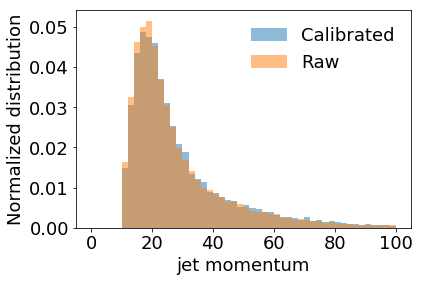

In [56]:
plt.hist(df_jet['nom']['jet_p'],range=(0,100.0),bins=50,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df_jet['raw']['jet_p'],range=(0,100.0),bins=50,alpha=0.5,normed=True, label='Raw')
plt.xlabel('jet momentum')
#plt.yscale('log')
plt.legend(loc='best',frameon=False)
plt.ylabel('Normalized distribution')
plt.show()

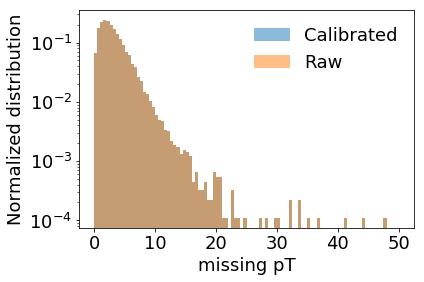

In [94]:
plt.hist(df['nom']['ptmiss'],range=(0,50.0),bins=100,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df['raw']['ptmiss'],range=(0,50.0),bins=100,alpha=0.5,normed=True, label='Raw')
plt.xlabel('missing pT')
plt.yscale('log')
plt.legend(loc='best')
plt.ylabel('Normalized distribution')
plt.show()

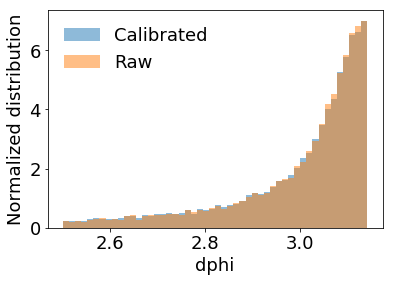

In [93]:
plt.hist(df_jet['nom']['jet_dphi'],range=(2.5,np.pi),bins=50,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df_jet['raw']['jet_dphi'],range=(2.5,np.pi),bins=50,alpha=0.5,normed=True, label='Raw')
plt.xlabel('dphi')
plt.legend(loc='best')
plt.ylabel('Normalized distribution')
plt.show()

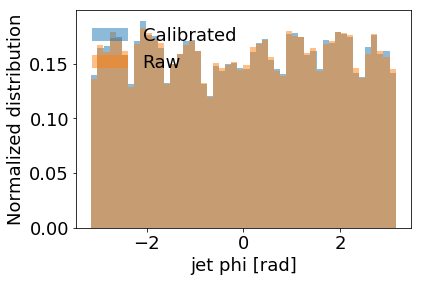

In [92]:
plt.hist(df_jet['nom']['jet_phi'],bins=50,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df_jet['raw']['jet_phi'],bins=50,alpha=0.5,normed=True, label='Raw')
plt.xlabel('jet phi [rad]')
plt.legend(loc='best')
plt.ylabel('Normalized distribution')
plt.show()

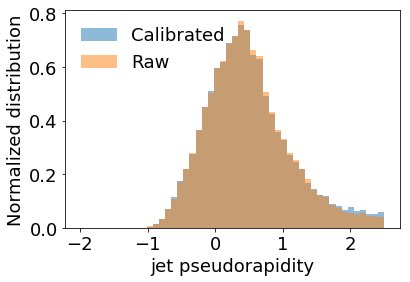

In [91]:
plt.hist(df_jet['nom']['jet_eta'],range=(-2.0,2.5),bins=50,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df_jet['raw']['jet_eta'],range=(-2.0,2.5),bins=50,alpha=0.5,normed=True, label='Raw')
plt.xlabel('jet pseudorapidity')
plt.legend(loc='best')
plt.ylabel('Normalized distribution')
plt.show()

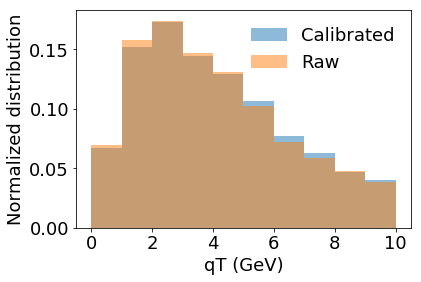

In [90]:
plt.hist(df_jet['nom']['jet_qt'],range=(0,10),bins=10,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df_jet['raw']['jet_qt'],range=(0,10),bins=10,alpha=0.5,normed=True, label='Raw')
plt.xlabel('qT (GeV)')
plt.legend(loc='best')
plt.ylabel('Normalized distribution')
plt.show()

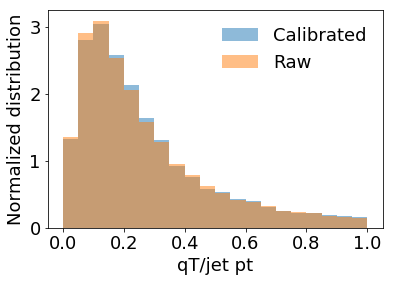

In [89]:
plt.hist(df_jet['nom']['jet_qtnormjetpt'],range=(0,1),bins=20,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df_jet['raw']['jet_qtnormjetpt'],range=(0,1),bins=20,alpha=0.5,normed=True, label='Raw')
plt.xlabel('qT/jet pt')
plt.legend(loc='best')
plt.ylabel('Normalized distribution')
plt.show()

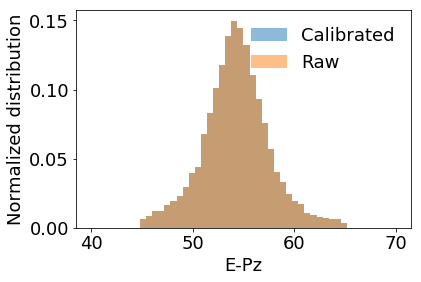

In [88]:
plt.hist(df['nom']['Empz'],range=(40,70),bins=50,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df['raw']['Empz'],range=(40,70),bins=50,alpha=0.5,normed=True, label='Raw')
#plt.yscale('log')
plt.xlabel('E-Pz')
plt.legend(loc='best')
plt.ylabel('Normalized distribution')
plt.show()

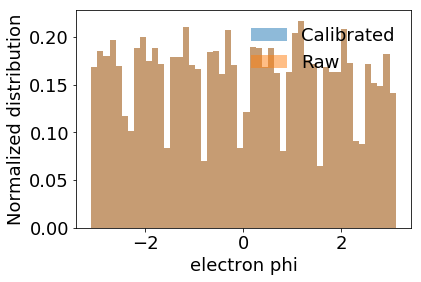

In [87]:
plt.hist(df['nom']['e_phi'],bins=50,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df['raw']['e_phi'],bins=50,alpha=0.5,normed=True, label='Raw')
#plt.yscale('log')
plt.xlabel('electron phi')
plt.legend(loc='best')
plt.ylabel('Normalized distribution')
plt.show()

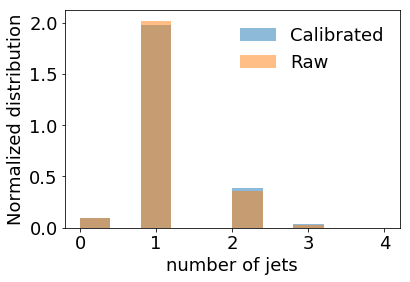

1.1506572


In [86]:
plt.hist(df['nom']['njets'],bins=10,alpha=0.5,normed=True,label='Calibrated')
plt.hist(df['raw']['njets'],bins=10,alpha=0.5,normed=True, label='Raw')
#plt.yscale('log')
plt.xlabel('number of jets')
plt.legend(loc='best')
plt.ylabel('Normalized distribution')
plt.show()

print df['nom']['njets'].mean()